https://www.kaggle.com/datasets/rishikumarrajvansh/marketing-insights-for-e-commerce-company

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from operator import attrgetter


# Show all columns in df
pd.set_option('display.max_columns', None)

plt.style.use('ggplot')

In [4]:
import os
import pandas as pd

# Define the directory path
directory_path = '../data/'

# File names
online_sales_file = 'Online_Sales.csv'
customers_data_file = 'CustomersData.xlsx'

# Full paths for each file
online_sales_path = os.path.join(directory_path, online_sales_file)
customers_data_path = os.path.join(directory_path, customers_data_file)

# Read each file into a separate dataframe
df_online_sales = pd.read_csv(online_sales_path)
df_customers_data = pd.read_excel(customers_data_path)



In [5]:
# Example use of the dataframes

# Display the first few rows of each dataframe

# Online Sales Data
print("\nOnline Sales Data:")
print(df_online_sales.head())

# Customers Data
print("\nCustomers Data:")
print(df_customers_data.head())




Online Sales Data:
   CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679         1/1/2019  GGOENEBJ079499   
1       17850           16680         1/1/2019  GGOENEBJ079499   
2       17850           16681         1/1/2019  GGOEGFKQ020399   
3       17850           16682         1/1/2019  GGOEGAAB010516   
4       17850           16682         1/1/2019  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  
0         1     153.71               6.5          Used  
1         1     153.71        

In [6]:
df_online_sales.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status'],
      dtype='object')

In [7]:
df_customers_data.columns

Index(['CustomerID', 'Gender', 'Location', 'Tenure_Months'], dtype='object')

In [8]:
df_online_sales.dtypes

CustomerID               int64
Transaction_ID           int64
Transaction_Date        object
Product_SKU             object
Product_Description     object
Product_Category        object
Quantity                 int64
Avg_Price              float64
Delivery_Charges       float64
Coupon_Status           object
dtype: object

In [9]:
df_customers_data.dtypes

CustomerID        int64
Gender           object
Location         object
Tenure_Months     int64
dtype: object

# Data Overview

- Online Sales (df_online_sales): Detailed transaction data including customer ID, transaction date, product details, and more.  Columns include: CustomerID, Transaction_ID, Transaction_Date, Product_SKU, Product_Description, Product_Category, Quantity, Avg_Price, Delivery_Charges, Coupon_Status.
- Customers Data (df_customers_data): Demographic and other related information about customers.  Columns include: CustomerID, Gender, Location, Tenure_Months.


# EDA

In [12]:
# Merge df_online_sales with df_customers_data

df_merged = df_online_sales.merge(df_customers_data, on='CustomerID')

In [13]:
df_merged.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Gender,Location,Tenure_Months
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,M,Chicago,12
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,M,Chicago,12
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,M,Chicago,12


## Missing Values

In [15]:
df_merged.isna().sum()

CustomerID             0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
Gender                 0
Location               0
Tenure_Months          0
dtype: int64

## Duplicate Values

In [17]:
df_merged.duplicated().sum()

0

## Univariate Analysis

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_merged is your DataFrame

# Function to plot a histogram and a boxplot for a given column in df_merged
def plot_hist_box(column_name, bin_count=30, hist_range=None):
    # Set up the matplotlib figure (1 row, 2 columns)
    fig, (ax_hist, ax_box) = plt.subplots(1, 2, figsize=(12, 5))

    # Histogram on the left
    sns.histplot(df_merged[column_name], bins=bin_count, kde=False, ax=ax_hist, binrange=hist_range)
    ax_hist.set_title(f'Histogram of {column_name}')
    ax_hist.set_xlabel(column_name)
    ax_hist.set_ylabel('Frequency')

    # Boxplot on the right
    sns.boxplot(x=df_merged[column_name], ax=ax_box)
    ax_box.set_title(f'Boxplot of {column_name}')
    ax_box.set_xlabel(column_name)

    # Adjust layout
    plt.tight_layout()
    plt.show()


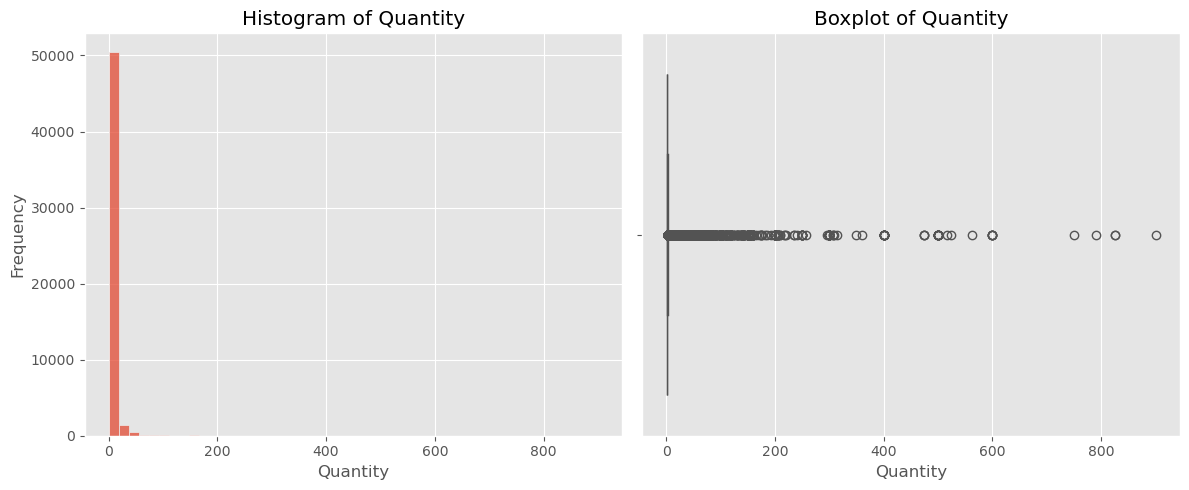

In [20]:
plot_hist_box('Quantity', 49)

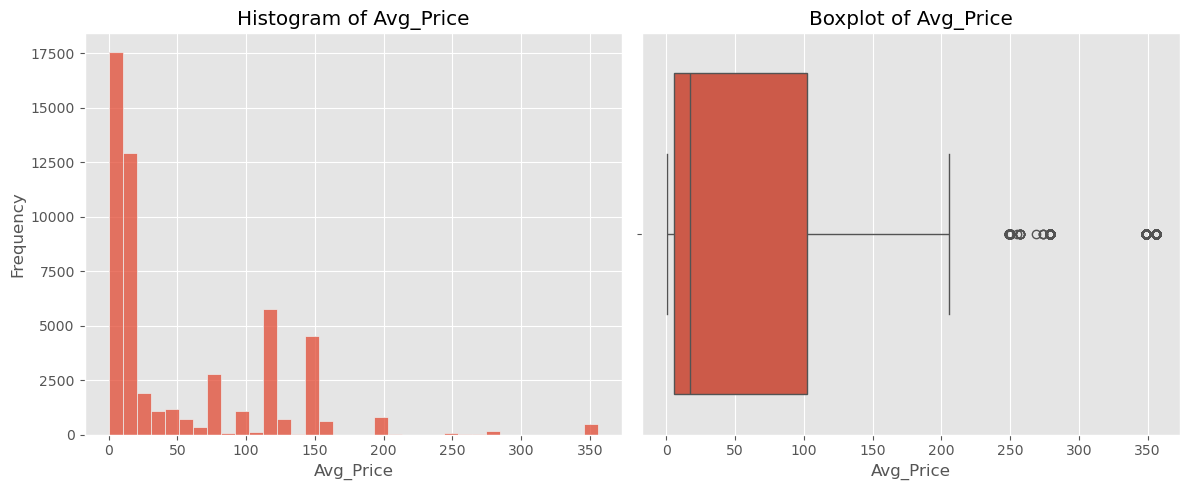

In [21]:
plot_hist_box('Avg_Price', 35)

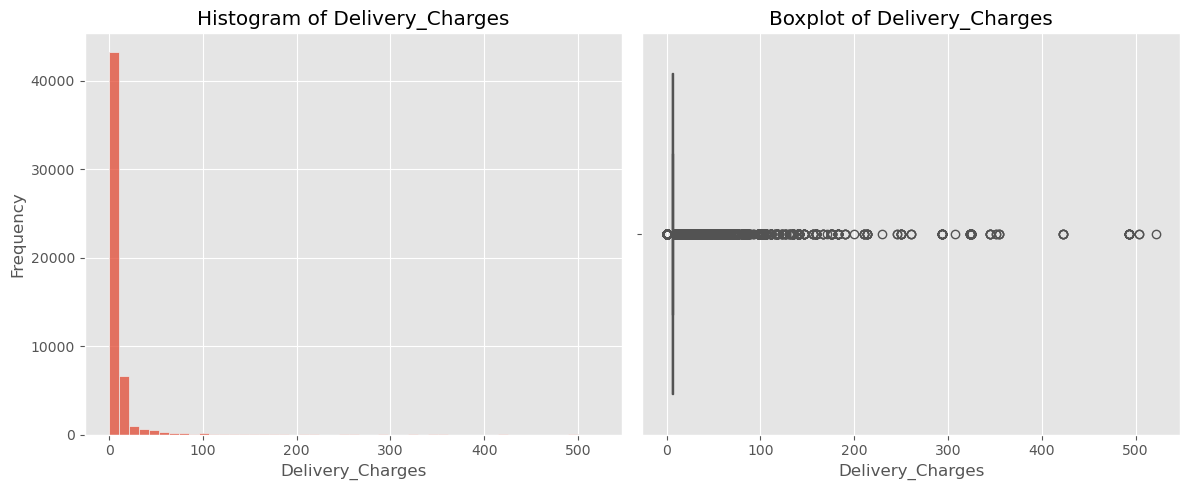

In [22]:
plot_hist_box('Delivery_Charges', 49)

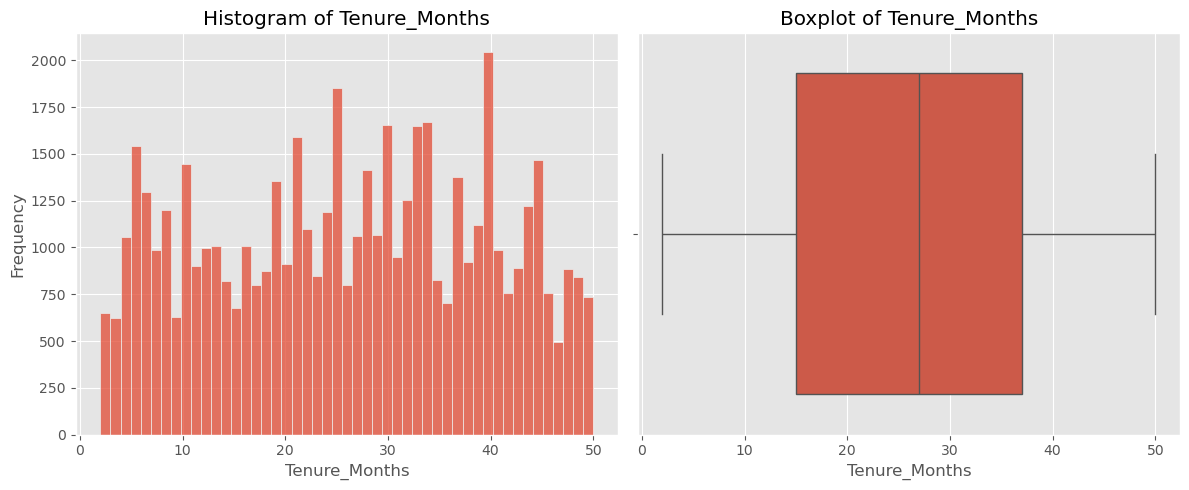

In [23]:
plot_hist_box('Tenure_Months', 49)

Based on the distributions of the numeric variables, the data will be scaled and normalized prior to modeling.

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_merged is your DataFrame

# Function to plot a barplot for a given categorical column in df_merged
def plot_barplot(column_name):
    # Check if the column is indeed categorical
    if df_merged[column_name].dtype == 'object' or df_merged[column_name].dtype.name == 'category':
        # Create a barplot
        plt.figure(figsize=(10, 6))
        sns.countplot(x=column_name, data=df_merged, order = df_merged[column_name].value_counts().index)
        plt.title(f'Bar Plot of {column_name}')
        plt.ylabel('Count')
        plt.xlabel(column_name)
        plt.show()
    else:
        print(f"The column '{column_name}' is not categorical.")




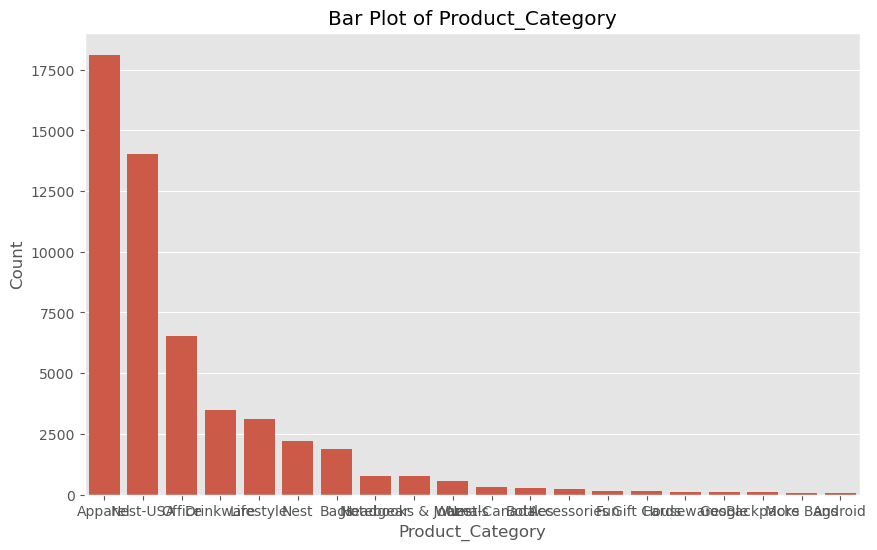

In [26]:
plot_barplot('Product_Category')

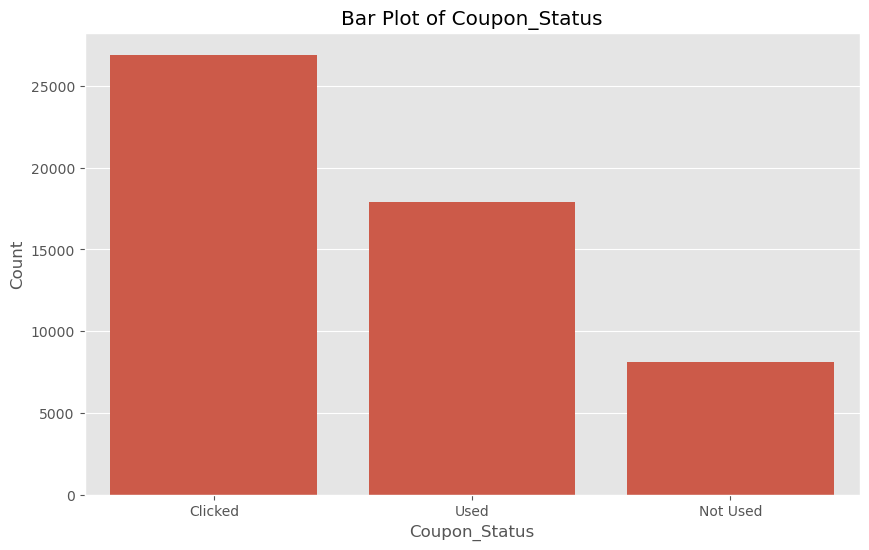

In [27]:
plot_barplot('Coupon_Status')

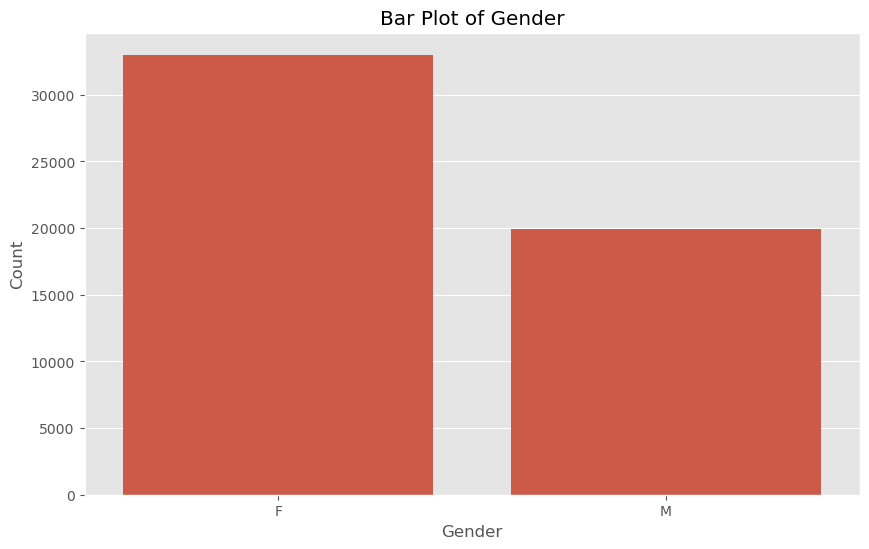

In [28]:
plot_barplot('Gender')

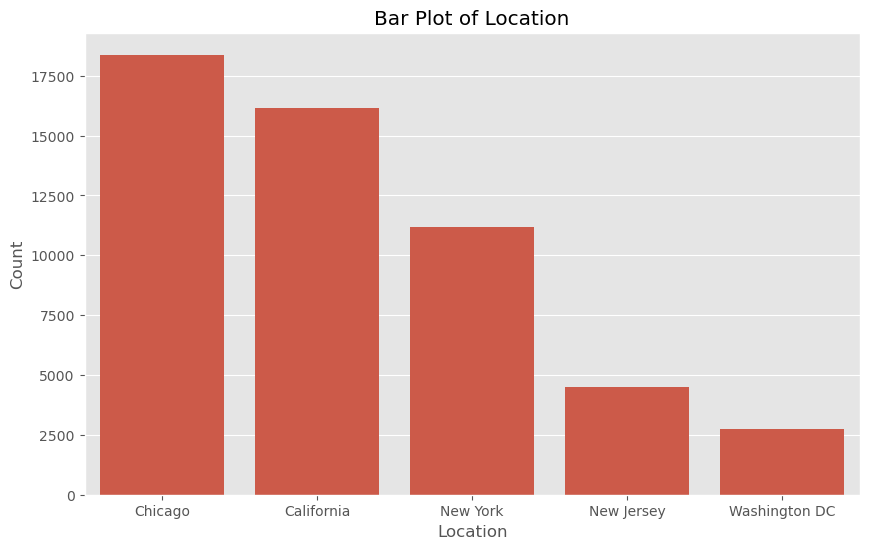

In [29]:
plot_barplot('Location')

## Bivariate Analysis

In [31]:
df_merged.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Gender,Location,Tenure_Months
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,M,Chicago,12
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,M,Chicago,12
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,M,Chicago,12


In [32]:
numeric = df_merged[['Quantity', 'Avg_Price', 'Delivery_Charges', 'Tenure_Months']]
numeric.corr()

,Quantity,Avg_Price,Delivery_Charges,Tenure_Months
Quantity,1.000000,-0.113996,0.191383,0.006867
Avg_Price,-0.113996,1.000000,-0.107799,-0.000785
Delivery_Charges,0.191383,-0.107799,1.000000,-0.014848
Tenure_Months,0.006867,-0.000785,-0.014848,1.000000


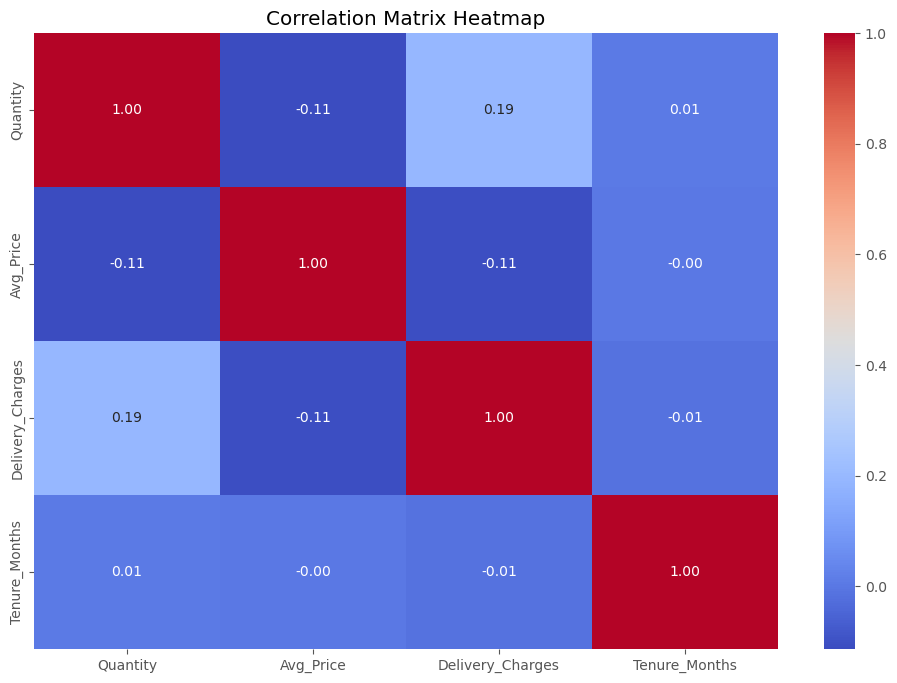

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_merged is your DataFrame

# Calculate the correlation matrix
corr_matrix = numeric.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns)

# Add a title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()


In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_merged is your DataFrame

# Function to plot a line plot of a given column against Transaction_Date
def plot_lineplot(column_name):
    if column_name in df_merged.columns and df_merged[column_name].dtype in ['int64', 'float64']:
        plt.figure(figsize=(12, 6))
        sns.lineplot(x='Transaction_Date', y=column_name, data=df_merged)
        plt.title(f'Line Plot of {column_name} over Time')
        plt.xlabel('Transaction Date')
        plt.ylabel(column_name)
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"The column '{column_name}' is not numerical or does not exist in the DataFrame.")



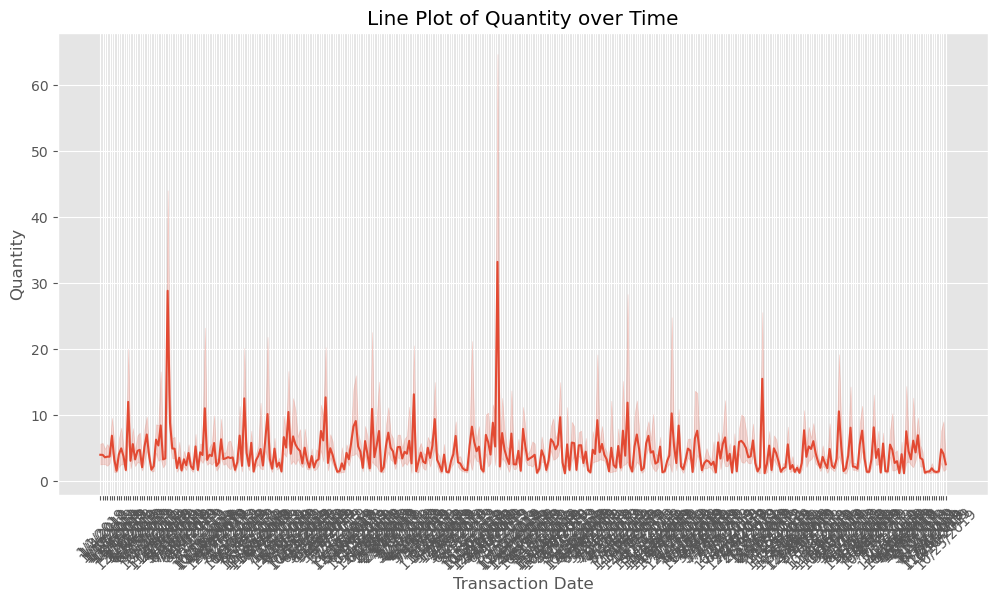

In [35]:
plot_lineplot('Quantity')

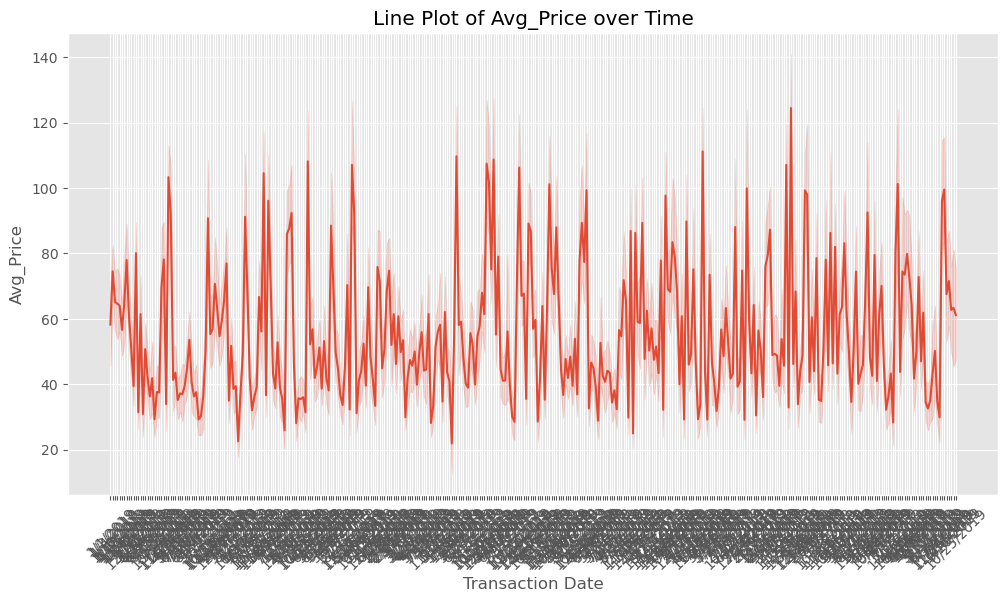

In [36]:
plot_lineplot('Avg_Price')

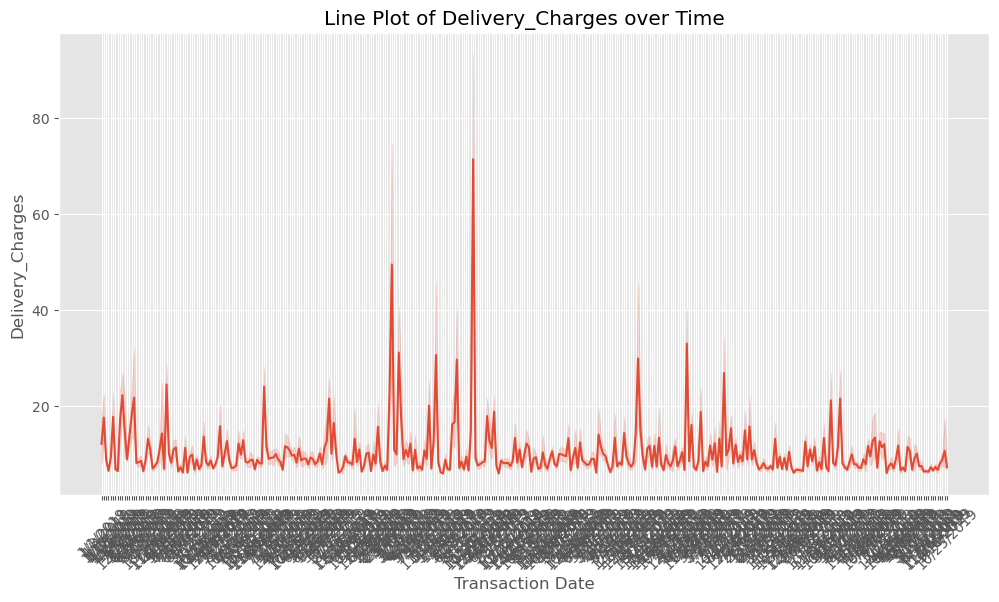

In [37]:
plot_lineplot('Delivery_Charges')

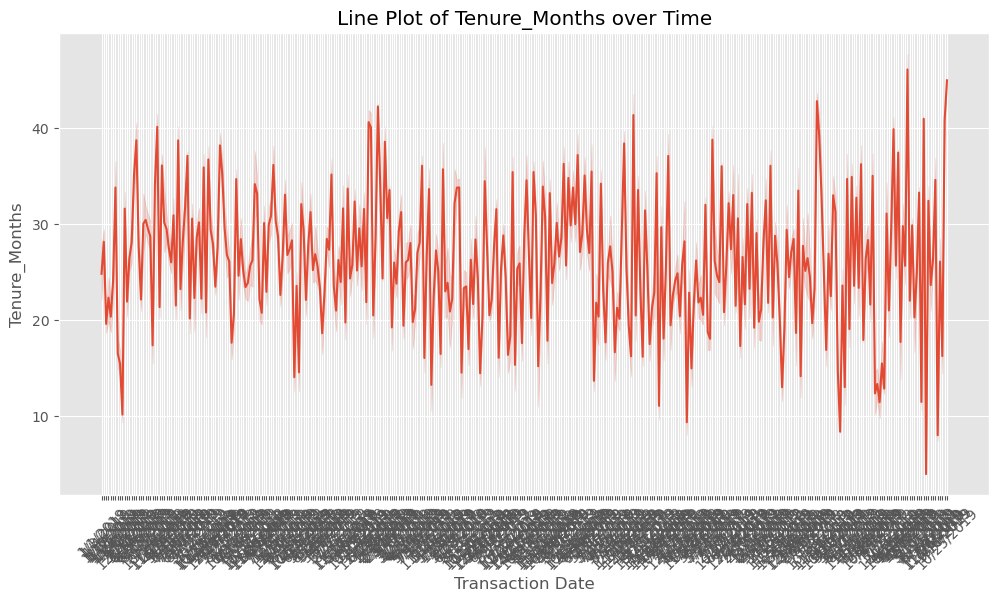

In [38]:
plot_lineplot('Tenure_Months')

In [39]:
df_online_sales['Transaction_Date'].describe()

count          52924
unique           365
top       11/27/2019
freq             335
Name: Transaction_Date, dtype: object

# K-Means Clustering

## Clustering using RFM

In [42]:
# Recalculate RFM Metrics and add back to original dataframe

df_online_sales = pd.read_csv(online_sales_path)

# Calculating RFM (Recency, Frequency, Monetary) values from the Online Sales data
# and adding these calculations back to the original DataFrame

df_online_sales['Total_Amount'] = df_online_sales['Quantity'] * df_online_sales['Avg_Price'] + df_online_sales['Delivery_Charges']

# Convert Transaction_Date to datetime for recency calculation
df_online_sales['Transaction_Date'] = pd.to_datetime(df_online_sales['Transaction_Date'])

# Calculate Monetary: Total spend per customer
monetary = df_online_sales.groupby('CustomerID').agg(Monetary=('Total_Amount', 'sum')).reset_index()

# Calculate Recency: Days since last purchase per customer
current_date = df_online_sales['Transaction_Date'].max()
recency = df_online_sales.groupby('CustomerID').agg(Last_Purchase_Date=('Transaction_Date', 'max')).reset_index()
recency['Recency'] = (current_date - recency['Last_Purchase_Date']).dt.days

# Calculate Frequency: Number of transactions per customer
frequency = df_online_sales.groupby('CustomerID').agg(Frequency=('Transaction_ID', 'nunique')).reset_index()

# Merge the RFM values back into the original DataFrame
df_online_sales_rfm = df_online_sales.merge(monetary, on='CustomerID', how='left')
df_online_sales_rfm = df_online_sales_rfm.merge(recency[['CustomerID', 'Recency']], on='CustomerID', how='left')
df_online_sales_rfm = df_online_sales_rfm.merge(frequency, on='CustomerID', how='left')

# Display the first few rows of the DataFrame with RFM values
df_online_sales_rfm.head()



,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Total_Amount,Monetary,Recency,Frequency
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,160.21,37714.02,339,177
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,160.21,37714.02,339,177
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,8.55,37714.02,339,177
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,94.15,37714.02,339,177
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,23.00,37714.02,339,177


In [43]:
df_online_sales_rfm.describe()

,CustomerID,Transaction_ID,Transaction_Date,Quantity,Avg_Price,Delivery_Charges,Total_Amount,Monetary,Recency,Frequency
count,52924.00000,52924.000000,52924,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000
mean,15346.70981,32409.825675,2019-07-05 19:16:09.450532864,4.497638,52.237646,10.517630,98.772385,11061.158287,115.536864,52.784786
min,12346.00000,16679.000000,2019-01-01 00:00:00,1.000000,0.390000,0.000000,4.120000,7.000000,0.000000,1.000000
25%,13869.00000,25384.000000,2019-04-12 00:00:00,1.000000,5.700000,6.000000,19.590000,2979.920000,32.000000,17.000000
50%,15311.00000,32625.500000,2019-07-13 00:00:00,1.000000,16.990000,6.000000,42.890000,6245.190000,92.000000,32.000000
75%,16996.25000,39126.250000,2019-09-27 00:00:00,2.000000,102.130000,6.500000,129.270000,11536.850000,173.000000,57.000000
max,18283.00000,48497.000000,2019-12-31 00:00:00,900.000000,355.740000,521.360000,10518.390000,83112.260000,364.000000,328.000000
std,1766.55602,8648.668977,NaN,20.104711,64.006882,19.475613,166.441239,15784.321400,96.305878,66.418196


In [44]:
df_online_sales_rfm.describe(include='O')

,Product_SKU,Product_Description,Product_Category,Coupon_Status
count,52924,52924,52924,52924
unique,1145,404,20,3
top,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Apparel,Clicked
freq,3511,3511,18126,26926


### Data Scaling

In [46]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Select relevant features for clustering
features_for_clustering = ['Recency', 'Frequency', 'Monetary']

# Preparing the pipeline for numerical features
numerical_features = ['Recency', 'Frequency', 'Monetary']
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)])

# Apply the transformations
cluster_prepared = preprocessor.fit_transform(df_online_sales_rfm[features_for_clustering])

# Now df_cluster_prepared is ready for clustering



In [47]:
cluster_prepared

array([[ 2.32036976,  1.87021623,  1.68858153],
       [ 2.32036976,  1.87021623,  1.68858153],
       [ 2.32036976,  1.87021623,  1.68858153],
       ...,
       [-1.19969786, -0.70440377, -0.62722125],
       [-1.19969786, -0.7646288 , -0.65318524],
       [-1.19969786, -0.7646288 , -0.65318524]])

In [48]:
import pandas as pd

# Convert the transformed data back into a DataFrame
cluster_prepared_df = pd.DataFrame(
    cluster_prepared, 
    columns=numerical_features, 
    index=df_online_sales_rfm.index
)

# Create new column names for the transformed features
transformed_column_names = [f"{col}_Transformed" for col in numerical_features]

# Rename the columns of the transformed DataFrame
cluster_prepared_df.columns = transformed_column_names

# Concatenate the transformed features with the original DataFrame
df_online_sales_rfm_transformed = pd.concat([df_online_sales_rfm, cluster_prepared_df], axis=1)

# Now df_online_sales_rfm_transformed has both original and transformed features



In [49]:
cluster_prepared_df

,Recency_Transformed,Frequency_Transformed,Monetary_Transformed
0,2.320370,1.870216,1.688582
1,2.320370,1.870216,1.688582
2,2.320370,1.870216,1.688582
3,2.320370,1.870216,1.688582
4,2.320370,1.870216,1.688582
...,...,...,...
52919,-1.199698,-0.704404,-0.627221
52920,-1.199698,-0.704404,-0.627221
52921,-1.199698,-0.704404,-0.627221
52922,-1.199698,-0.764629,-0.653185


### Cluster Determination

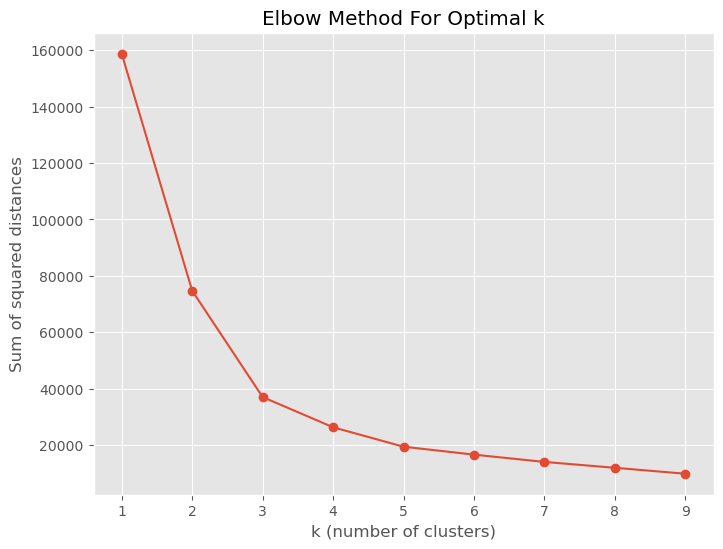

In [51]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Range of k values to try
k_values = range(1, 10)  # Adjust the range based on your data and needs

# List to store the sum of squared distances for each k
sum_of_squared_distances = []

# Fit KMeans for each k and store the sum of squared distances
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(cluster_prepared)
    sum_of_squared_distances.append(kmeans.inertia_)

# Create the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(k_values, sum_of_squared_distances, 'o-')
plt.xlabel('k (number of clusters)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [52]:
'''

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Assuming df_cluster_prepared is your DataFrame with standardized features for clustering

# Define the range of clusters to try
cluster_options = [2, 3, 4]

# Initialize lists to store metrics for each cluster amount
silhouette_scores = []
wcss_scores = []
db_scores = []

# Run K-Means for each cluster option and calculate metrics
for n_clusters in cluster_options:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_cluster_prepared)
    
    # Silhouette Score
    silhouette_avg = silhouette_score(df_cluster_prepared, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    # WCSS (Within-Cluster Sum of Squares)
    wcss = kmeans.inertia_
    wcss_scores.append(wcss)
    
    # Davies-Bouldin Index
    db_index = davies_bouldin_score(df_cluster_prepared, cluster_labels)
    db_scores.append(db_index)
    
    # Output the results
    print(f"Results for {n_clusters} clusters:")
    print(f"- Silhouette Score: {silhouette_avg:.3f}")
    print(f"- WCSS: {wcss:.3f}")
    print(f"- Davies-Bouldin Index: {db_index:.3f}\n")

# Visualization of the metrics
plt.figure(figsize=(18, 5))

# Silhouette Scores
plt.subplot(1, 3, 1)
plt.bar(cluster_options, silhouette_scores, color='blue', alpha=0.6)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Cluster Counts')

# WCSS Scores
plt.subplot(1, 3, 2)
plt.plot(cluster_options, wcss_scores, marker='o', linestyle='-', color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('WCSS for Different Cluster Counts')

# Davies-Bouldin Index Scores
plt.subplot(1, 3, 3)
plt.bar(cluster_options, db_scores, color='green', alpha=0.6)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Different Cluster Counts')

plt.tight_layout()
plt.show()

'''

'\n\nfrom sklearn.cluster import KMeans\nfrom sklearn.metrics import silhouette_score, davies_bouldin_score\nimport matplotlib.pyplot as plt\n\n# Assuming df_cluster_prepared is your DataFrame with standardized features for clustering\n\n# Define the range of clusters to try\ncluster_options = [2, 3, 4]\n\n# Initialize lists to store metrics for each cluster amount\nsilhouette_scores = []\nwcss_scores = []\ndb_scores = []\n\n# Run K-Means for each cluster option and calculate metrics\nfor n_clusters in cluster_options:\n    kmeans = KMeans(n_clusters=n_clusters, init=\'k-means++\', random_state=42, n_init=10)\n    cluster_labels = kmeans.fit_predict(df_cluster_prepared)\n    \n    # Silhouette Score\n    silhouette_avg = silhouette_score(df_cluster_prepared, cluster_labels)\n    silhouette_scores.append(silhouette_avg)\n    \n    # WCSS (Within-Cluster Sum of Squares)\n    wcss = kmeans.inertia_\n    wcss_scores.append(wcss)\n    \n    # Davies-Bouldin Index\n    db_index = davies_boul

To begin, let's first describe what each metric generally indicates:

Silhouette Score: This measures how similar an object is to its own cluster compared to other clusters. The value ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If the silhouette score is highest for 2 clusters, it suggests that 2 clusters might be optimal.

WCSS (Within-Cluster Sum of Squares): This is the sum of squared distances of samples to their closest cluster center. We look for a point where the WCSS begins to decrease at a slower rate, which is often called the "elbow" point. The elbow method looks for the number of clusters at which the WCSS begins to level off.

Davies-Bouldin Index: A lower Davies-Bouldin index relates to a model with better separation between the clusters. An ideal number of clusters will have the lowest Davies-Bouldin index value.

Let's proceed to analyze the plots you've provided. Please wait a moment while I process the image.

Error analyzing
It looks like there was an error processing the image due to request limitations. However, I can still provide a textual analysis based on the usual output of such plots.

To compare the results from the three metrics:

Silhouette Score:

Higher scores are better. The plot typically allows you to see which cluster number gives you the highest silhouette score. A high silhouette score close to 1 suggests that the clusters are well apart from each other and clearly defined.
WCSS:

Lower scores are better, indicating tighter clusters. The elbow method involves looking for a point where the WCSS graph starts to level off, suggesting that adding more clusters does not significantly improve the fit of the model.
Davies-Bouldin Index:

Lower scores are better, with the lowest score indicating the best clustering structure. You're looking for the number of clusters that gives you the lowest Davies-Bouldin score.
To make a decision on the number of clusters to use:

Look for where the silhouette score is highest.
Find the "elbow" point on the WCSS plot where the rate of decrease sharply changes.
Identify the number of clusters that results in the lowest Davies-Bouldin score.
If all three metrics agree on a particular number of clusters, that's a strong indication that it's a good choice. If they disagree, you'll have to use your judgment and possibly additional domain knowledge to decide. It's also a good practice to visually inspect the clusters if possible to ensure they make sense for your application.

In [54]:
from sklearn.cluster import KMeans

# Assuming 'cluster_prepared' is your scaled data

# First run of KMeans with 2 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters_2 = kmeans_2.fit_predict(cluster_prepared)

# Second run of KMeans with 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_3 = kmeans_3.fit_predict(cluster_prepared)

# Add the cluster labels to your transformed DataFrame
df_online_sales_rfm_transformed['Cluster_2'] = clusters_2
df_online_sales_rfm_transformed['Cluster_3'] = clusters_3

# Now df_online_sales_rfm_transformed has both sets of cluster labels




In [55]:
df_online_sales_rfm_transformed

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Total_Amount,Monetary,Recency,Frequency,Recency_Transformed,Frequency_Transformed,Monetary_Transformed,Cluster_2,Cluster_3
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,160.21,37714.02,339,177,2.320370,1.870216,1.688582,0,2
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,160.21,37714.02,339,177,2.320370,1.870216,1.688582,0,2
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,8.55,37714.02,339,177,2.320370,1.870216,1.688582,0,2
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,94.15,37714.02,339,177,2.320370,1.870216,1.688582,0,2
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,23.00,37714.02,339,177,2.320370,1.870216,1.688582,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,2019-12-31,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,127.80,1160.99,0,6,-1.199698,-0.704404,-0.627221,0,1
52920,14410,48494,2019-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,55.42,1160.99,0,6,-1.199698,-0.704404,-0.627221,0,1
52921,14410,48495,2019-12-31,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,158.38,1160.99,0,6,-1.199698,-0.704404,-0.627221,0,1
52922,14600,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,409.10,751.17,0,2,-1.199698,-0.764629,-0.653185,0,1


In [56]:
# Assuming 'df_online_sales_rfm' is a pandas DataFrame and has a 'Cluster' column
# We'll group by 'Cluster' and calculate mean for numeric variables only

# Select only numeric variables for the groupby operation
numeric_cols = df_online_sales_rfm_transformed.select_dtypes(include=[np.number]).columns.tolist()

# Group by 'Cluster' and calculate mean for numeric variables only
cluster_means = df_online_sales_rfm_transformed.groupby('Cluster_2')[numeric_cols].mean()

# Display the resulting DataFrame with cluster means
cluster_means


,CustomerID,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,Total_Amount,Monetary,Recency,Frequency,Recency_Transformed,Frequency_Transformed,Monetary_Transformed,Cluster_2,Cluster_3
Cluster_2,,,,,,,,,,,,,,
0,15374.330321,32370.903234,4.429802,52.257021,10.449426,97.693736,7338.296266,121.728813,37.151745,0.064295,-0.235375,-0.23586,0.0,1.332509
1,14965.781442,32946.624651,5.433203,51.970439,11.458270,113.648577,62405.023368,30.140581,268.387926,-0.886728,3.246176,3.25287,1.0,0.174958


In [57]:
# Assuming 'df_online_sales_rfm' is a pandas DataFrame and has a 'Cluster' column
# We'll group by 'Cluster' and calculate mean for numeric variables only

# Select only numeric variables for the groupby operation
numeric_cols = df_online_sales_rfm_transformed.select_dtypes(include=[np.number]).columns.tolist()

# Group by 'Cluster' and calculate mean for numeric variables only
cluster_means = df_online_sales_rfm_transformed.groupby('Cluster_3')[numeric_cols].mean()

# Display the resulting DataFrame with cluster means
cluster_means

,CustomerID,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,Total_Amount,Monetary,Recency,Frequency,Recency_Transformed,Frequency_Transformed,Monetary_Transformed,Cluster_2,Cluster_3
Cluster_3,,,,,,,,,,,,,,
0,14989.624661,31328.908198,5.780827,50.113113,11.902622,114.498438,68499.290999,32.643293,291.238482,-0.860740,3.590220,3.638970,1.000000,0.0
1,15232.144262,35754.668454,4.249642,55.443509,9.979338,100.849070,8907.980431,63.063193,44.734150,-0.544870,-0.121212,-0.136414,0.018651,1.0
2,15645.307655,25762.127316,4.774074,46.062003,11.369578,91.695034,5131.849033,237.789920,26.352328,1.269437,-0.397974,-0.375649,0.000000,2.0


### Cluster Analysis

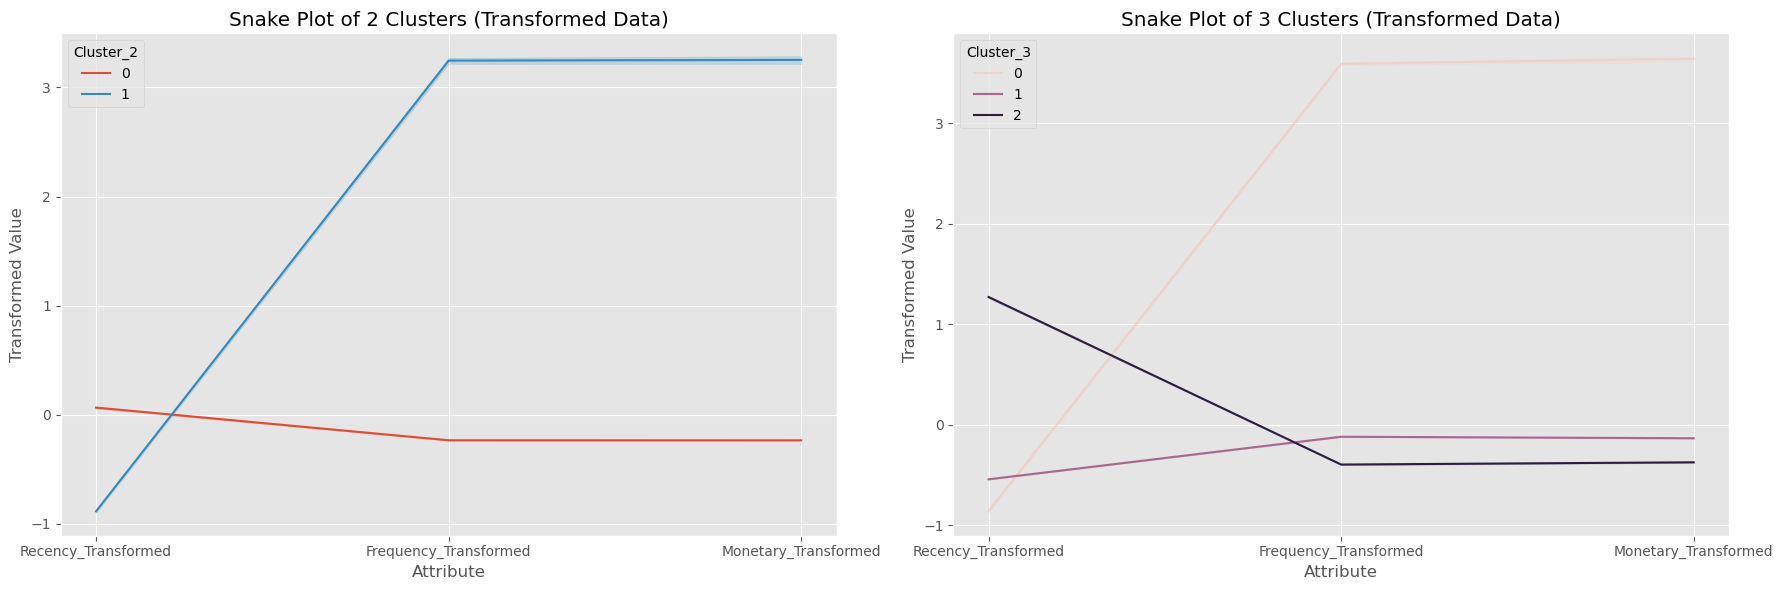

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_online_sales_rfm_transformed contains the original, transformed, and cluster label columns

# Melt the DataFrame into a long format for the snake plots
# Make sure to use the transformed column names
transformed_features = ['Recency_Transformed', 'Frequency_Transformed', 'Monetary_Transformed']
df_melt_2 = pd.melt(df_online_sales_rfm_transformed, id_vars=['Cluster_2'], value_vars=transformed_features, var_name='Attribute', value_name='Value')
df_melt_3 = pd.melt(df_online_sales_rfm_transformed, id_vars=['Cluster_3'], value_vars=transformed_features, var_name='Attribute', value_name='Value')

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Snake plot for 2 clusters
sns.lineplot(data=df_melt_2, x='Attribute', y='Value', hue='Cluster_2', ax=ax[0])
ax[0].set_title('Snake Plot of 2 Clusters (Transformed Data)')
ax[0].set_xlabel('Attribute')
ax[0].set_ylabel('Transformed Value')

# Snake plot for 3 clusters
sns.lineplot(data=df_melt_3, x='Attribute', y='Value', hue='Cluster_3', ax=ax[1])
ax[1].set_title('Snake Plot of 3 Clusters (Transformed Data)')
ax[1].set_xlabel('Attribute')
ax[1].set_ylabel('Transformed Value')

plt.tight_layout()
plt.show()




Snake Plot for 2 Clusters:
Pattern and Shape: Each line in the plot represents one cluster. Observe how these lines differ in height and shape across the attributes of Recency, Frequency, and Monetary. The separation between lines indicates how distinct the clusters are.
Cluster Characteristics:
Cluster 1: Might show a certain trend, like higher recency (less recent interactions) or lower monetary values, which could indicate less engaged or lower-spending customers.
Cluster 2: Could display opposite traits, such as lower recency (more recent interactions) or higher monetary values, suggesting more active or higher-spending customers.
Interpretation: This plot helps identify two distinct groups of customers. One group could be more valuable or engaged than the other, guiding different marketing or engagement strategies.
Snake Plot for 3 Clusters:
Additional Complexity: Introducing a third cluster adds complexity. Look for a new line that might split one of the original clusters or form a completely new pattern.
Refined Segmentation:
Cluster 3: This new cluster could represent a middle ground or a specific customer behavior not captured in the 2-cluster model. For instance, it might identify customers who are recent but moderate in frequency and monetary aspects.
Comparison with 2 Clusters: Check if the 3-cluster model offers more nuanced insights. Do the three lines show clear separation and distinct patterns that better capture customer behaviors?
Overall Comparison:
Distinctness: Are the clusters more clearly separated in the 3-cluster model? More separation can indicate more distinct customer segments.
Business Insights: Consider which model provides more actionable insights. While the 3-cluster model might be more detailed, the 2-cluster model could be simpler to interpret and act upon.
Strategic Decisions: Think about how these segments align with your business goals. For example, a cluster with high frequency but low monetary value might be targeted for upselling, while a cluster with high monetary value but low frequency might be a focus for re-engagement strategies.
In summary, the snake plots provide a visual representation of how customer segments differ in terms of their buying behaviors. The choice between 2 and 3 clusters should be guided by the clarity of the segmentation, the distinctness of the clusters, and how well these segments align with your business objectives and strategies.




## Clustering based on Customer Demographics

In [62]:
import pandas as pd

df_online_sales = pd.read_csv(online_sales_path)
df_customers_data = pd.read_excel(customers_data_path)

# Merge the RFM data with the customer demographics data on 'CustomerID'
df_rfm_enhanced = pd.merge(df_online_sales, df_customers_data, on='CustomerID', how='left')

# Now df_rfm_enhanced contains both the RFM metrics and the customer demographics
print(df_rfm_enhanced.head())


   CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679         1/1/2019  GGOENEBJ079499   
1       17850           16680         1/1/2019  GGOENEBJ079499   
2       17850           16681         1/1/2019  GGOEGFKQ020399   
3       17850           16682         1/1/2019  GGOEGAAB010516   
4       17850           16682         1/1/2019  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status Gender Location  \
0         1     153.71               6.5          Used      M  Chicago   
1         1     

In [63]:
df_rfm_enhanced['Revenue'] = df_rfm_enhanced['Quantity'] * df_rfm_enhanced['Avg_Price']

# Display the first few rows of the DataFrame with RFM values
df_rfm_enhanced.head()


,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Gender,Location,Tenure_Months,Revenue
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,153.71
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,153.71
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,M,Chicago,12,2.05
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,M,Chicago,12,87.65
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,M,Chicago,12,16.50


### Data Scaling

In [65]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Assume df_rfm_enhanced is your DataFrame and is already loaded with RFM, Gender, Location, and Tenure_Months

# Define numerical and categorical features
numerical_features = ['Tenure_Months', 'Revenue']
categorical_features = ['Gender', 'Location', 'Coupon_Status', 'Product_Category']

# Create pipelines for numerical and categorical transformations
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformations into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit the preprocessor and transform the data
X_prepared = preprocessor.fit_transform(df_rfm_enhanced)



In [66]:
# Feature names for numerical features
numerical_feature_names = numerical_features

# Get feature names for categorical features from OneHotEncoder
# 'cat' corresponds to the named transformer within the ColumnTransformer
onehot_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine all feature names
all_feature_names = numerical_feature_names + onehot_feature_names.tolist()

# Now all_feature_names contains the names of all features in the order they appear in X_prepared


### Cluster Determination

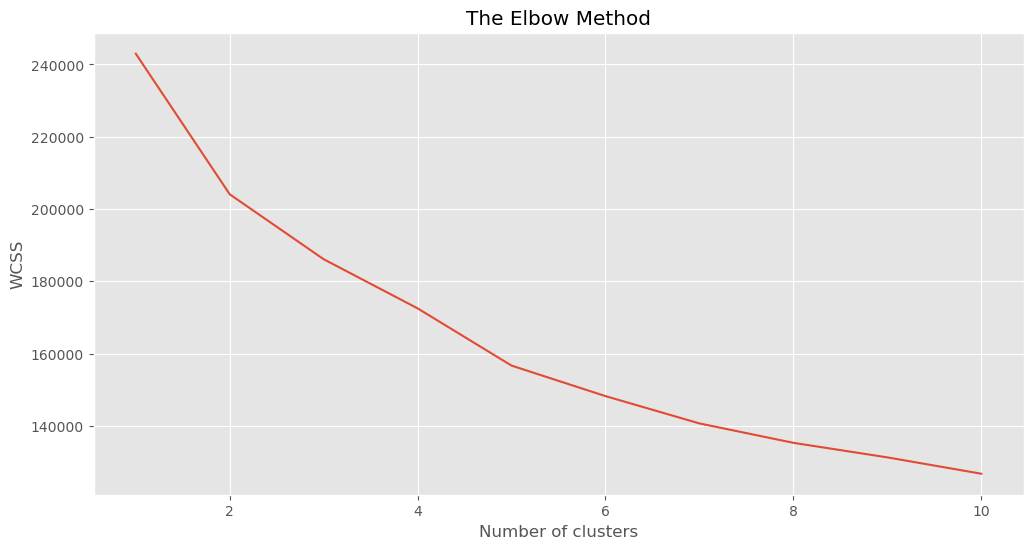

In [68]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming X is your data array for which you want to find the optimal number of clusters
wcss = []

# Trying different numbers of clusters and storing the WCSS for each
for i in range(1, 11):  # This will test for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_prepared)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph to observe the 'Elbow'
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sums of squares
plt.show()


Results for 2 clusters:
- Silhouette Score: 0.163
- WCSS: 204077.648
- Davies-Bouldin Index: 2.119

Results for 3 clusters:
- Silhouette Score: 0.146
- WCSS: 186116.568
- Davies-Bouldin Index: 2.060

Results for 4 clusters:
- Silhouette Score: 0.140
- WCSS: 172524.606
- Davies-Bouldin Index: 1.955

Results for 5 clusters:
- Silhouette Score: 0.142
- WCSS: 156690.877
- Davies-Bouldin Index: 1.666

Results for 6 clusters:
- Silhouette Score: 0.131
- WCSS: 148249.145
- Davies-Bouldin Index: 1.847



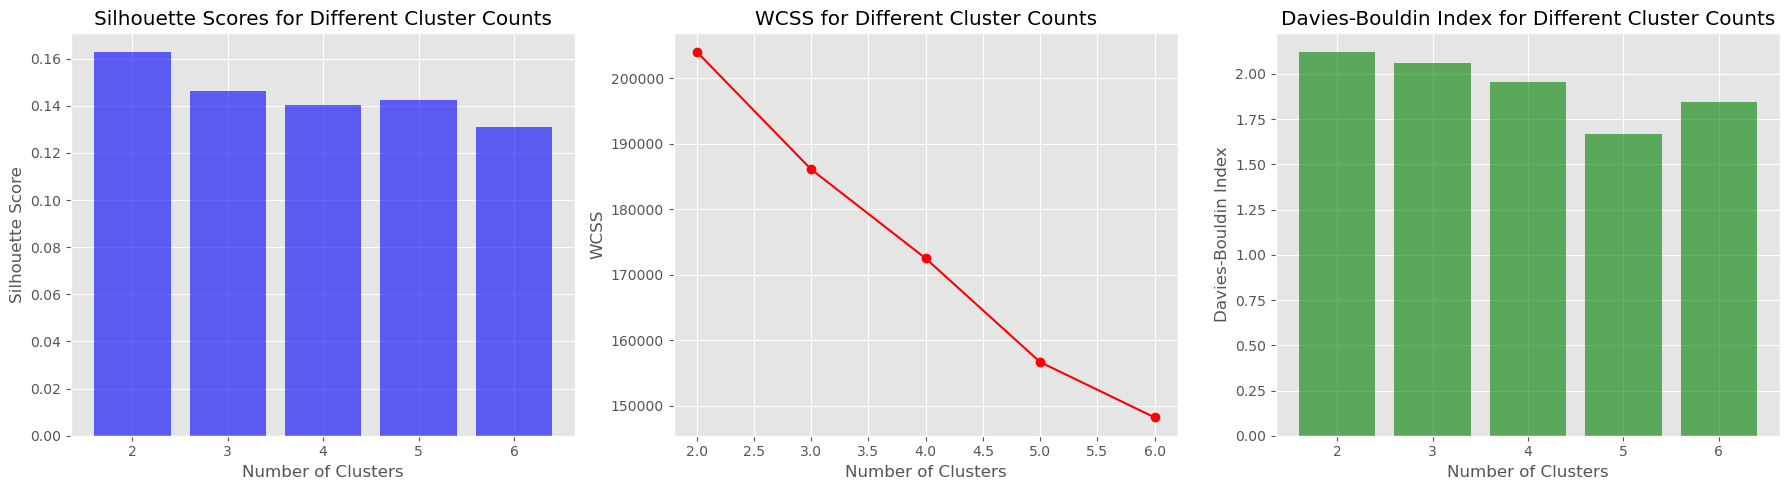

In [69]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Define the range of clusters to try
cluster_options = [2, 3, 4, 5, 6]

# Initialize lists to store metrics for each cluster amount
silhouette_scores = []
wcss_scores = []
db_scores = []

# Run K-Means for each cluster option and calculate metrics
for n_clusters in cluster_options:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_prepared)
    
    # Silhouette Score
    silhouette_avg = silhouette_score(X_prepared, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    # WCSS (Within-Cluster Sum of Squares)
    wcss = kmeans.inertia_
    wcss_scores.append(wcss)
    
    # Davies-Bouldin Index
    X_dense = X_prepared.toarray()
    db_index = davies_bouldin_score(X_dense, cluster_labels)
    db_scores.append(db_index)
    
    # Output the results
    print(f"Results for {n_clusters} clusters:")
    print(f"- Silhouette Score: {silhouette_avg:.3f}")
    print(f"- WCSS: {wcss:.3f}")
    print(f"- Davies-Bouldin Index: {db_index:.3f}\n")

# Visualization of the metrics
plt.figure(figsize=(18, 5))

# Silhouette Scores
plt.subplot(1, 3, 1)
plt.bar(cluster_options, silhouette_scores, color='blue', alpha=0.6)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Cluster Counts')

# WCSS Scores
plt.subplot(1, 3, 2)
plt.plot(cluster_options, wcss_scores, marker='o', linestyle='-', color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('WCSS for Different Cluster Counts')

# Davies-Bouldin Index Scores
plt.subplot(1, 3, 3)
plt.bar(cluster_options, db_scores, color='green', alpha=0.6)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Different Cluster Counts')

plt.tight_layout()
plt.show()

In [70]:
from sklearn.cluster import KMeans

# Assuming you've already determined the optimal number of clusters (let's say it's k)
optimal_clusters = 2  # Replace k with the number of clusters you've chosen

# Initialize KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=33)

# Fit the KMeans model to the data
kmeans.fit(X_prepared)

# Retrieve the cluster assignments for each data point
cluster_labels = kmeans.labels_

# Optionally, add the cluster labels back to your original DataFrame for further analysis
df_rfm_enhanced['Cluster'] = cluster_labels

# Now you can analyze the resulting clusters
# For example, you can check the size of each cluster
print(pd.value_counts(df_rfm_enhanced['Cluster']))

# And perform further analysis based on these cluster labels

Cluster
0    27323
1    25601
Name: count, dtype: int64


C:\Users\trobb\AppData\Local\Temp\ipykernel_21764\1161137982.py:20: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(df_rfm_enhanced['Cluster']))


In [71]:
from sklearn.cluster import KMeans

# Assuming you've already determined the optimal number of clusters (let's say it's k)
optimal_clusters = 5  # Replace k with the number of clusters you've chosen

# Initialize KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=33)

# Fit the KMeans model to the data
kmeans.fit(X_prepared)

# Retrieve the cluster assignments for each data point
cluster_labels = kmeans.labels_

# Optionally, add the cluster labels back to your original DataFrame for further analysis
df_rfm_enhanced['Cluster'] = cluster_labels

# Now you can analyze the resulting clusters
# For example, you can check the size of each cluster
print(pd.value_counts(df_rfm_enhanced['Cluster']))

# And perform further analysis based on these cluster labels


Cluster
1    16215
2    14375
4    12438
3     9862
0       34
Name: count, dtype: int64


C:\Users\trobb\AppData\Local\Temp\ipykernel_21764\3103642333.py:20: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(df_rfm_enhanced['Cluster']))


### Feature Importances

In [73]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_prepared, kmeans.labels_)
feature_importances = rf.feature_importances_


In [74]:
# Assuming 'preprocessor' is your ColumnTransformer used in the pipeline
# and it contains steps named 'num' for numerical and 'cat' for categorical

# Retrieve feature names from the ColumnTransformer
numerical_features = preprocessor.named_transformers_['num'].get_feature_names_out()
categorical_features = preprocessor.named_transformers_['cat'].get_feature_names_out()

# Combine all feature names
all_feature_names = np.concatenate([numerical_features, categorical_features])


In [75]:
# Pair feature names with their corresponding importances
feature_importance_dict = dict(zip(all_feature_names, feature_importances))

# Sort the features by their importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

# Print the sorted features with their importances
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")



Tenure_Months: 0.49471852647027503
Revenue: 0.15708062492140867
Gender_F: 0.12443001488615008
Gender_M: 0.12170989920401382
Product_Category_Nest-USA: 0.05980043202361508
Product_Category_Apparel: 0.012491087940747546
Product_Category_Office: 0.004432997359348399
Product_Category_Nest: 0.0038660796770287097
Location_California: 0.003069188941530075
Location_New York: 0.002465699296038572
Location_Chicago: 0.0022264010074709096
Product_Category_Lifestyle: 0.0020226329713683914
Product_Category_Drinkware: 0.0017742707647419543
Location_Washington DC: 0.0013717290548512057
Location_New Jersey: 0.0011845772883469776
Product_Category_Bags: 0.0010743959831702324
Coupon_Status_Clicked: 0.0010419029291948757
Coupon_Status_Used: 0.0009491056373379474
Coupon_Status_Not Used: 0.0008779335018499634
Product_Category_Nest-Canada: 0.000785550324266855
Product_Category_Notebooks & Journals: 0.0005468449848958648
Product_Category_Headgear: 0.00047308886716444375
Product_Category_Waze: 0.000363224593306

Remove Gender and location from model as they contribute very little

In [77]:
import pandas as pd

# Merge the RFM data with the customer demographics data on 'CustomerID'
df_rfm_enhanced = pd.merge(df_online_sales_rfm, df_customers_data, on='CustomerID', how='left')

# Now df_rfm_enhanced contains both the RFM metrics and the customer demographics
print(df_rfm_enhanced.head())

   CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  Total_Amount  \
0         1     153.71               6.5          Used        160.21   
1         1     153.

In [78]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Assume df_rfm_enhanced is your DataFrame and is already loaded with RFM, Gender, Location, and Tenure_Months

# Define numerical and categorical features
numerical_features = ['Recency', 'Frequency', 'Monetary', 'Tenure_Months']

# Create pipelines for numerical and categorical transformations
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])


# Combine transformations into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ])

# Fit the preprocessor and transform the data
X_prepared = preprocessor.fit_transform(df_rfm_enhanced)



In [79]:
# Feature names for numerical features
numerical_feature_names = numerical_features

# Combine all feature names
all_feature_names = numerical_feature_names

# Now all_feature_names contains the names of all features in the order they appear in X_prepared

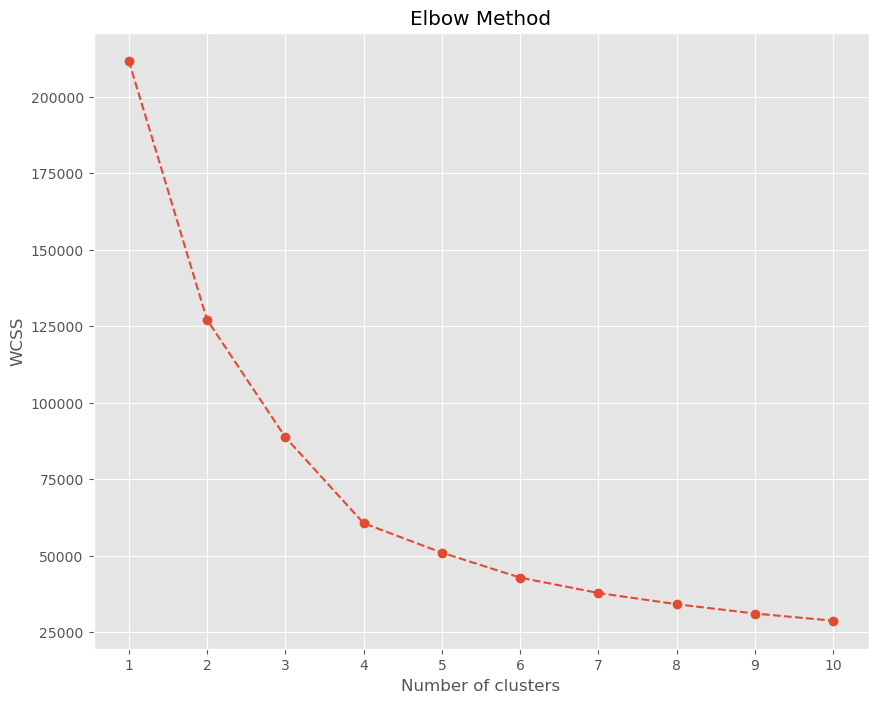

In [80]:
# Calculate WCSS for a range of k values
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=33)
    kmeans.fit(X_prepared)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.show()

In [81]:
from sklearn.cluster import KMeans

# Assuming you've already determined the optimal number of clusters (let's say it's k)
optimal_clusters = 3  # Replace k with the number of clusters you've chosen

# Initialize KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=33)

# Fit the KMeans model to the data
kmeans.fit(X_prepared)

# Retrieve the cluster assignments for each data point
cluster_labels = kmeans.labels_

# Optionally, add the cluster labels back to your original DataFrame for further analysis
df_rfm_enhanced['Cluster'] = cluster_labels

# Now you can analyze the resulting clusters
# For example, you can check the size of each cluster
print(pd.value_counts(df_rfm_enhanced['Cluster']))

# And perform further analysis based on these cluster labels


Cluster
0    25029
2    24943
1     2952
Name: count, dtype: int64


C:\Users\trobb\AppData\Local\Temp\ipykernel_21764\2126215230.py:20: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(df_rfm_enhanced['Cluster']))


In [82]:
#df_rfm_enhanced

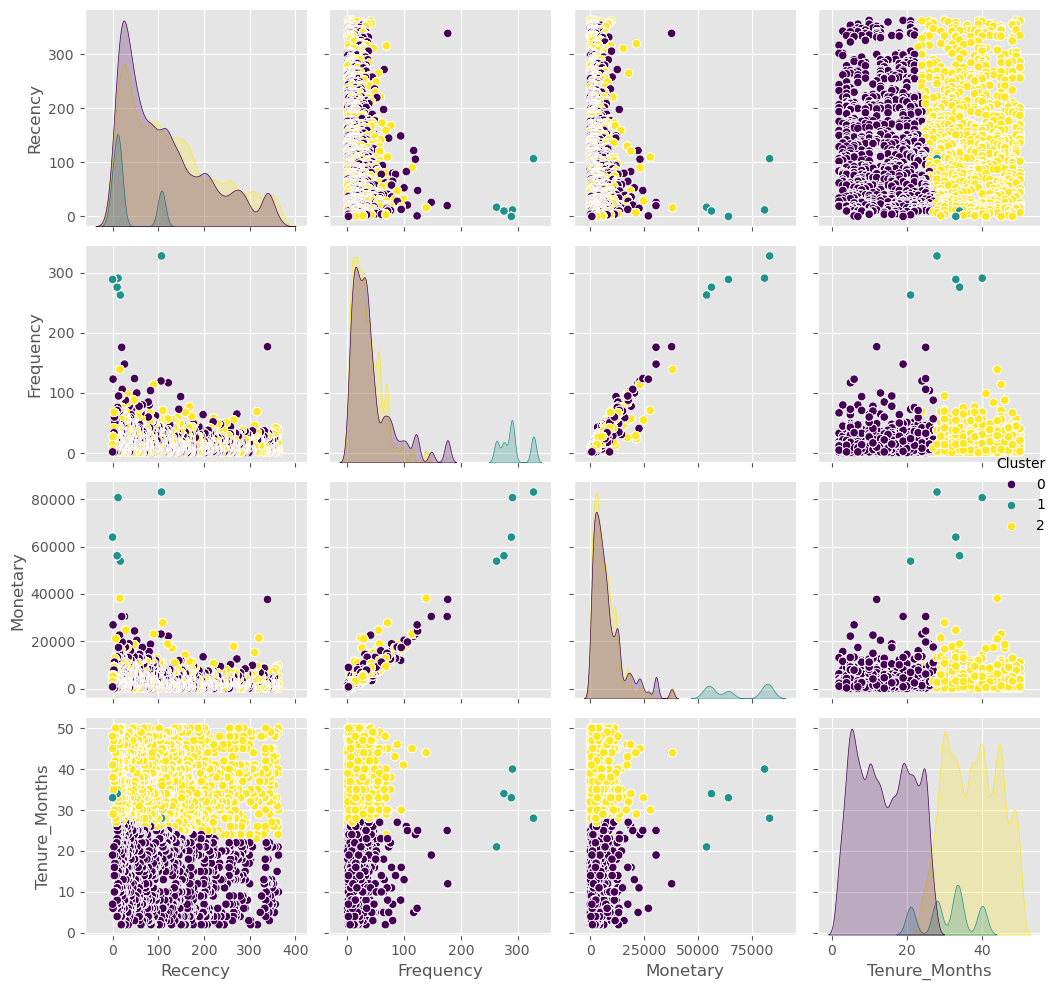

In [83]:
# Assuming df_online_sales_rfm contains the cluster assignments

# Pair plot for a subset of features
subset_features = ['Recency', 'Frequency', 'Monetary', 'Tenure_Months']  # You can choose different/more features
sns.pairplot(df_rfm_enhanced, vars=subset_features, hue='Cluster', palette='viridis')
plt.tight_layout()
plt.show()
